# DATA 4010 Capstone Project Code Repository - Chris Karvelas
The following contains representative examples of each specific operation/test performed during this project



## We will start by loading the required packages (grouped by which section they first appear)

**Note:** The run-order values are not in perfect order, as edits were made to some of the quicker-to-run code chunks after initial running, this has **no** impact on running this code whatsoever.

In [1]:
# 1) separating questions
import time
import shutil

# 2) resizing data
from PIL import Image
import os
from os import listdir

# 3) pre-processing
import pandas as pd
import numpy as np 
import skimage 
from skimage.io import imread
from sklearn.model_selection import train_test_split
from itertools import chain

# 4) KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# 5) confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# 6) SVM
from sklearn import svm
from sklearn.svm import SVC

# 7) CNN
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 8) LLM
import openai
from openai import OpenAI


# 1) Separating Images into Individual Questions

Note, this section **will only run once** and only if the files have not yet been moved.

In [47]:
start=time.time()# time the run

# file path of desired folder to store the images

dst_path = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\Full_Size"
# NOTE: since this action had already been performed, this destination folder simply holds a copy of each image. 
#This folder will not appear anywhere else.

# in the repo, instead the "Original" or "Resized" folder will contain the images.

# go based on modulo, if there are no scanning errors, you just need one range, 
# there are multiple ranges here due to scanning errors ranges will need to be adjusted depending on the dataset
for i in range(1,2047):
    if i%16==14:
        if i !=414:
        
# file path of each image, W2023_ is part of each image name, str(i) provides the page number of the particular solution
            src_path = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Tests\W2023_"+str(i)+".jpg"
            shutil.move(src_path, dst_path)
    elif i==416:
        src_path = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Tests\W2023_"+str(i)+".jpg"
        shutil.move(src_path, dst_path)
        
# NOTE, page 416 was an anomolous scanning that was out of order, but after its booklet the previous math did not change
# We do not move page 414, as it is not a Q9 answer

for i in range(2047,7855):
     if i%16==12:
        src_path = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Tests\W2023_"+str(i)+".jpg"
        shutil.move(src_path, dst_path)

for i in range(7855, 8177):
      if i%16==14:
        src_path = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Tests\W2023_"+str(i)+".jpg"
        shutil.move(src_path, dst_path)
end=time.time()

print(end-start) #time elapsed (in seconds)
#this is not the most efficient way of doing this, as we do not know how many pages are in the wrong order,
# but this is a very fast process nonetheless

0.7889904975891113


# 2)  Second, we resize the images and convert to greyscale.

In [4]:
# file path of folder containing images
folder_dir = r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\Original"


for images in os.listdir(folder_dir):
    im_direct=folder_dir+ "\\" + images
    image = Image.open(im_direct).convert('L')# convert to greyscale to remove a dimension
    new_image = image.resize((500, 640))
    
    # output folder file path, the \\ must stay at the end of the string
    out_path=r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\Resized\\"+images
    new_image.save(out_path)
  

# 3) Now we can import the data into an array

In [6]:
# first approach to load in the images=> multiple ranges approach

# file path of one image, to get dimensions
im=skimage.io.imread(r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\Resized\W2023_14.jpg")

num_rows, num_cols = im.shape

size=num_rows*num_cols
data_full=np.empty(size, dtype='int')

# make list of all numbers for files
vals=list(chain(range(14,414,16),range(416,417),range(430,2047,16),range(2060,7855,16),range(7870, 8177,16)))

# Since we now know the ranges where the values work, we can take every 16th value from each range (except for page 416).

In [7]:
# file path of the image, similar format to in 1)
path1=r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\Resized\W2023_"

path3=".jpg"# filetype

for x in vals:

    path2=str(x)# get number of question

    im=skimage.io.imread(path1+path2+path3)# read in the file name of each image

    
    im=np.reshape(im,size)# reshape it to a row vector
    
    if x==vals[0]:# if it's the first value, make it the first row
        data_full=im
    else:
        data_full=A = np.vstack([data_full, im])# add the new image to the dataset as the next row


# 4) Import Target Data

In [32]:
# dataset containing scores for the W2023 Final
dataset=pd.read_excel(r"C:\Users\CK\Desktop\DATA4010 Project\w2023_Ordered.xlsx")

targ=dataset["Q9"]# take the column of grades for target data

# create new vector to hold binary data, in case we want to keep the original grades for future use
target=np.zeros(len(targ))

for i in range(0,len(targ)):# for Q9, do 0/4 vs >0/4
    
    if targ[i]!=0:# if not zero, make it 1
        target[i]=1

In [24]:
# get 80-20 train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_full,target, 
                                               test_size=0.2, random_state=69)

# 5) Model 1: KNN

In [26]:
start=time.time()
knn=KNeighborsClassifier()# define the classifier
k_range=list(range(1,10))# check all numbers from 1-9 inclusive

param_grid = {'n_neighbors': k_range,
              'weights':['uniform','distance'],# define the possible hyperparameters
}
grid=GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',verbose=2)# run the search, focus on accuracy
grid_search_written=grid.fit(X_train,y_train)# fit the model from the search on the training data
end=time.time()

print(end-start)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   1.9s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.7s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.6s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.7s
[CV] END ....................n_neighbors=1, we

In [27]:
grid.best_params_# view the best parameters

{'n_neighbors': 4, 'weights': 'uniform'}

In [28]:
start=time.time()
clf_KNN_written=grid.best_estimator_# use the parameters to get the metric scores

y_pred=clf_KNN_written.predict(X_test)# get the predictions from the best model

clf_KNN_written.score(X_test,y_test)# get the accuracy
end=time.time()

print(end-start)


2.1243200302124023


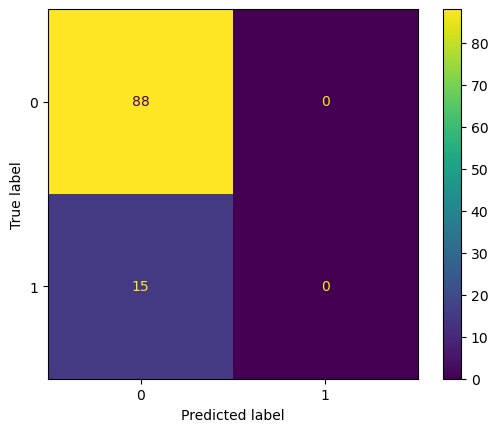

In [29]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)# get the values for the confusion matrix

# create the plot
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()# show the plot
plt.show() 

# 6) Model 2: SVM

## Using S2023 data
So we repeat previous loading scheme

In [9]:
# second approach to loading in the images:=> sequential numbering method 

# the data has already been organized by question, following the same process as in 1)
vals = []

# we had renamed the values to do this, the W2023 shows how to do it without renaming the files
for i in range(1, 253):
    number = "{:03d}".format(i)# each spot had 3 digits
    vals.append(number)
vals[0:6]# display how the names look

['001', '002', '003', '004', '005', '006']

In [48]:
# file path of any one image, to get the dimensions
im=skimage.io.imread(
    r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Crowdmark\Ungraded\Finals\Questions\Q2\Resized\All Resized\001.jpg")
num_rows, num_cols = im.shape

size=num_rows*num_cols
data_full=np.empty(size, dtype='int')


In [103]:
# destination folder of image, the \\ must stay there
path1=r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Crowdmark\Ungraded\Finals\Questions\Q2\Resized\All Resized\\"

path3=".jpg"


for x in vals:

    path2=str(x)
    im=skimage.io.imread(path1+path2+path3)# read in the file
    
    im=np.reshape(im,size)
    if x==vals[0]:
        data_full=im
    else:
        data_full = np.vstack([data_full, im])

In [111]:
# dataset containing the scores for the S2023 Final
dataset=pd.read_excel(r"C:\Users\CK\Desktop\DATA4010 Project\Exams and results - ordered.xlsx")
targ=dataset['23smath1500final Q2']# take the columns of grades for Q2


In [136]:
targetS=np.zeros(len(targ))# create copy that we will adjust

for i in range(0,len(targ)):# for Q2, do 4/4 vs <4/4
    if targ[i]==4:
        targetS[i]=1

        

(252,)

In [137]:
X_trainS,X_testS,y_trainS,y_testS=train_test_split(data_full,target, 
                                                   test_size=0.2, random_state=69)

In [138]:
start = time.time()

# Initialize the model
clf = svm.SVC(decision_function_shape='ovo', random_state=42)

param_grid = {
    'C': [ 1,0.5, 0.1],
    'kernel': ['linear', 'poly'],
    'degree': [1,2,3],
}
# run grid search
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy', verbose=2)
grid_search= grid.fit(X_trainS, y_trainS)


end = time.time()
print("Time taken:", end - start)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.1s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.1s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.2s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.2s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.3s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.3s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.5s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.2s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.3s
[CV] END .......................C=1, degree=1, kernel=linear; total time=   1.3s
[CV] END .........................C=1, degree=1, kernel=poly; total time=   1.3s
[CV] END .........................C=1, degree=

In [139]:
print(grid.best_params_)

{'C': 1, 'degree': 1, 'kernel': 'poly'}


In [140]:
start = time.time()


clf_SVC = grid.best_estimator_


y_predS = clf_SVC.predict(X_testS)

# Evaluate the model on the test data
accuracy = clf_SVC.score(X_testS, y_testS)
print("Accuracy:", accuracy)

end = time.time()
print("Time taken:", end - start)

Accuracy: 0.5098039215686274
Time taken: 0.6535894870758057


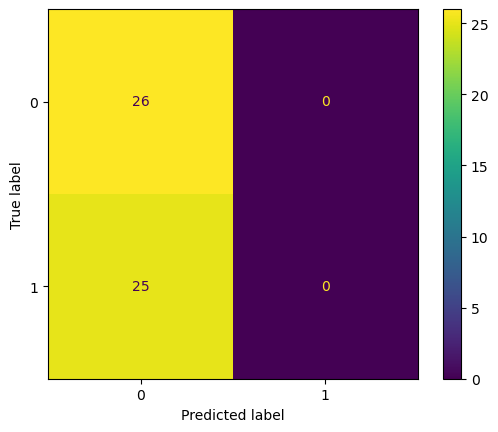

In [141]:
confusion_matrix = metrics.confusion_matrix(y_testS, y_predS)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# 7) Model 3: CNN

We need to re-import the data so that it does not get reshaped into a row vector. 

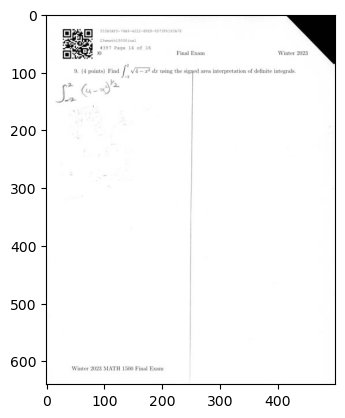

In [2]:
# containment folder of the image data
filenames=os.listdir(r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\ResizedQ9")

sample=random.choice(filenames)# pick any image

# file path of the image data folder, keep the \\
image=tf.keras.utils.load_img(r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\ResizedQ9\\"+sample)
plt.imshow(image)# show the image importation works!

In [3]:
start=time.time()
model2D= Sequential()#define the model

# input layer
model2D.add(Conv2D(32, (5,5), activation='relu', input_shape=(500,640,1)))
model2D.add(MaxPooling2D(pool_size=(2,2)))
model2D.add(Dropout(0.25))

# hidden layer
model2D.add(Conv2D(64, (5,5), activation='relu'))
model2D.add(MaxPooling2D(pool_size=(2,2)))
model2D.add(Dropout(0.25))

# output layer
model2D.add(Flatten())
model2D.add(Dense(32, activation='relu'))
model2D.add(Dropout(0.5))
model2D.add(Dense(2,activation='softmax'))# give number of classes

model2D.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

model2D.summary()

end=time.time()

print(end-start)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 496, 636, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 248, 318, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 248, 318, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 244, 314, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 157, 64)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 122, 157, 64)      0

In [30]:
# put the data files into a dataset
filepaths=[]
# file path of the folder containing the images
source_dir=r"C:\Users\CK\Desktop\DATA4010 Project\Old Tests\Winter 2023\Winter2023\Q9\ResizedQ9"
filelist=os.listdir(source_dir)# get list of file paths
for f in filelist: # add all the file paths into a dataframe
    fpath=os.path.join(source_dir,f)
    filepaths.append(fpath)


# this function loads the images into a dataset
def preprocess_images(filepaths, target_size=(500, 640)):
    images = []
    for filepath in filepaths: #load each image into a dataset
        if os.path.exists(filepath):
            img = load_img(filepath, target_size=target_size, color_mode='grayscale')
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
        else:# make sure all image files exist
            print(f"File not found: {filepath}")
    return np.array(images)


img_data = preprocess_images(filepaths)

In [33]:
X_trainC,X_testC,y_trainC,y_testC=train_test_split(img_data,target,  
                                                   test_size=0.2, random_state=69)

# split into train and validation sets
train_data,validation_data, train_y,validation_y=train_test_split(X_trainC,y_trainC, 
                                                                  test_size=0.2, random_state=69)

In [9]:
#fit the model
epochs=50

start=time.time()

history=model2D.fit(train_data,train_y, epochs=epochs,
                    validation_data=(validation_data,validation_y))

end=time.time()

print(end-start)

Epoch 1/50
11/11 [==============================] - 127s 10s/step - loss: 12.3297 - accuracy: 0.8129 - val_loss: 0.6813 - val_accuracy: 0.8293
Epoch 2/50
11/11 [==============================] - 107s 10s/step - loss: 1.0241 - accuracy: 0.8804 - val_loss: 0.6182 - val_accuracy: 0.8293
Epoch 3/50
11/11 [==============================] - 128s 11s/step - loss: 0.5608 - accuracy: 0.8804 - val_loss: 0.5516 - val_accuracy: 0.8293
Epoch 4/50
11/11 [==============================] - 152s 14s/step - loss: 0.4047 - accuracy: 0.8804 - val_loss: 0.5132 - val_accuracy: 0.8293
Epoch 5/50
11/11 [==============================] - 106s 10s/step - loss: 0.3660 - accuracy: 0.8804 - val_loss: 0.4779 - val_accuracy: 0.8293
Epoch 6/50
11/11 [==============================] - 114s 10s/step - loss: 0.3411 - accuracy: 0.8834 - val_loss: 0.4877 - val_accuracy: 0.8293
Epoch 7/50
11/11 [==============================] - 112s 10s/step - loss: 0.3458 - accuracy: 0.8804 - val_loss: 0.5196 - val_accuracy: 0.8293
Epoch

In [10]:
#get matetrics
prediction=model2D.predict(X_testC)

model2D.evaluate(X_testC, y_testC)

4/4 [==============================] - 4s 1s/step - loss: 1.3134 - accuracy: 0.8058


[1.3133502006530762, 0.8058252334594727]

4/4 [==============================] - 4s 845ms/step


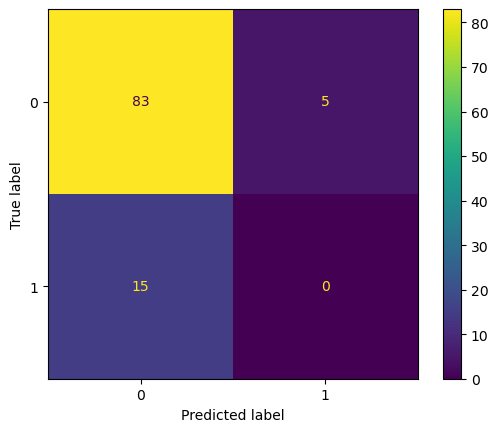

In [17]:
pred_x = model2D.predict(X_testC)
pred_y = np.argmax(prediction, axis=1)#predict the class with the highest probability of membership

confusion_matrix = confusion_matrix(y_testC, pred_y)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 


# 8) Model 4: LLMs
These tests are very repetitive and also cost money to run, so we will just show one example of a binary classification problem with no training and 5 training examples and the multi-class problem with no training and 5 training examples. The API Key will be omitted, as it directly links to my account. All tests shown here were done on Q1 of the mock exam.

In [2]:
client=OpenAI(api_key='')# Put your unique API key in the quoations

## No Training Binary

In [35]:
# spreadsheed with the LaTeX code data for question
written_data=pd.read_excel(r"C:\Users\CK\Desktop\DATA4010 Project\Q1 iPad Data.xlsx")

w_data=written_data["Data"][:100]# keep classes 0, 2

# add a dummy character to empty values so tests can all be graded
w_data=['.' if x is np.nan else x for x in w_data]

target_w=written_data["Target"][:100]# just take the first 2 classes
target_w[50:]=target_w[50:]-1# change the class from 2 to 1

w_data = np.array(w_data)# ensure it is a numpy array for shuffling
target_w = np.array(target_w)


num_samp=len(w_data)
# random permutation since we have no training data we can't do train-test split
random_indices = np.random.permutation(num_samp)
X_test=w_data[random_indices]
y_test=target_w[random_indices]

In [44]:
# create prompt
instructions='''
respond with 0 for a wrong answer and 1 for a right answer, only answer with 0 or 1, the question is: 
Determine $\\lim _{x \rightarrow \\infty} \x0crac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4}$. 
'''
additional='''
Each content has 10 answers, each separated by the pipe symbol. 
Please provide 10 answers for each, separated by a comma
'''

instructions=instructions+additional

In [12]:
# combine the strings
combined_strings = []
for i in range(0, len(X_test), 10):# need to do 10 so that each iteration has the same number of solutions
    # concatenate groups of 10 strings and append to the combined strings list
    combined_string = ' | '.join(X_test[i:i+10])
    combined_strings.append(combined_string)



In [6]:
Q1_no_train=[] # create a variable to store the grades
val=0
start=time.time()
for dat in combined_strings:# loop through testing data
    
    val=val+1
    print(val)# tracker to ensure loop is working
    response = client.chat.completions.create(# this function interfaces with ChatGPT
      model="gpt-4", # specify which ChatGPT model you are using
      messages=[
          {"role": "system", "content": instructions}, # provide the prompt
          {"role": "user", "content": dat}, #provide the answers to grade
      ]
    )
    


    classification=response.choices[0].message.content # get the grade(s) outputted by the model 
    Q1_no_train.append(classification) #add the grade(s) to the dataset
end=time.time()
print(str(end-start) + " seconds")

1
2
3
4
5
6
7
8
9
10
17.737219095230103 seconds


In [8]:
answers_Q1 = []

for strings in Q1_no_train:
    answers_Q1.extend([int(element.strip()) for element in strings.split(',')])
    
print(len(answers_Q1))# check if the correct number of values were outputted

100


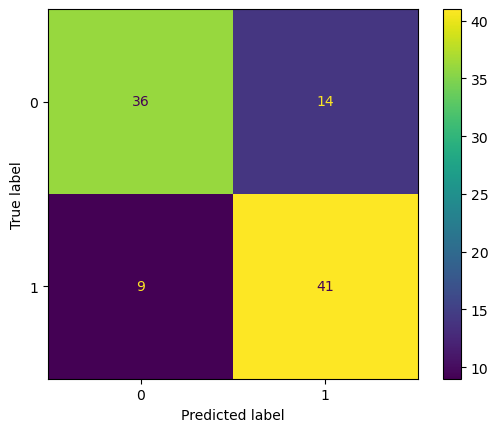

In [9]:
confusion_matrix = metrics.confusion_matrix(y_test, answers_Q1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

## 5 Training per Class

In [37]:
# adjust test size to include more or less training data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(w_data, target_w, test_size=90, 
                                                            stratify=target_w, random_state=42) 

In [43]:
instructions='''
respond with 0 for a wrong answer and 1 for a right answer, only answer with 0 or 1, the question is: 
Determine $\lim _{x \rightarrow \infty} \frac{x+\pi \sin (2 x)}{3 x+\sqrt{x}+4}$. Here are some examples:
'''

additional='''
Each content has 10 answers, each separated by the pipe symbol. 
Please provide 10 answers for each, separated by a comma
'''

# create a string with the training data
training_5 = ""
for i in range(len(X_train_5)):
    training_5+=(X_train_5[i] + ", scores a " +str(y_train_5[i])+ ", ")#add the training data and grade to the string

# combine all the strings to create the prompt
instructions+=(training_5+additional)
instructions

# everything after this is essentially the same as the no-training example

'\nrespond with 0 for a wrong answer and 1 for a right answer, only answer with 0 or 1, the question is: \nDetermine $\\lim _{x \rightarrow \\infty} \x0crac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4}$. Here are some examples:\nthe limit is 0, scores a 0, $$\n=0\n$$, scores a 0, ., scores a 0, $$\n\\begin{gathered}\n\\lim _{x \\rightarrow \\infty} \\frac{1+ \\pi \\frac{\\sin (2 x)}{x}}{3+x^{-1 / x}+4 / 3} \\\\\n=1 / 3\n\\end{gathered}\n$$, scores a 1, $$\n\\begin{array}{r}\n=\\lim _{x \\rightarrow \\infty} \\frac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4} \\\\\n=\\lim _{x \\rightarrow \\infty} \\frac{\\frac{1+\\pi \\sin (2 x)}{x}}{3+x^{-1 / 2}+\\frac{4}{x}} \\\\\n=1 / 3\n\\end{array}\n$$, scores a 1, $$\n\\begin{gathered}\n\\lim _{x \\rightarrow \\infty} \\frac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4} \\\\\n=\\lim _{x \\rightarrow \\infty} \\frac{1+\\frac{\\pi \\sin (2 x)}{x}}{3+x^{-1 / 2}+\\frac{4}{x}} \\\\\n=1 / 3\n\\end{gathered}\n$$, scores a 1, $$\n\\begin{aligned}\n& \\lim _{x \\rightarrow \\inft

In [15]:
combined_strings_5 = []
for i in range(0, len(X_test_5), 10):

    combined_string = ' | '.join(X_test_5[i:i+10])
    combined_strings_5.append(combined_string)



In [22]:
answers_5combined_shuffled=[]
val=0
start=time.time()
for dat in combined_strings_5:
    val=val+1
    print(val)# tracker to ensure loop is working
    response = client.chat.completions.create(
      model="gpt-4",
      messages=[
          {"role": "system", "content": instructions},
          {"role": "user", "content": dat},
      ]
    )

    classification=response.choices[0].message.content
    answers_5combined_shuffled.append(classification)
end=time.time()

print(str(end-start)+ " seconds")


1
2
3
4
5
6
7
8
9
13.7994384765625 seconds


In [23]:
answers_5_shuffled = []

for strings in answers_5combined_shuffled:
    answers_5_shuffled.extend([int(element.strip()) for element in strings.split(',')])

print(len(answers_5_shuffled))

90


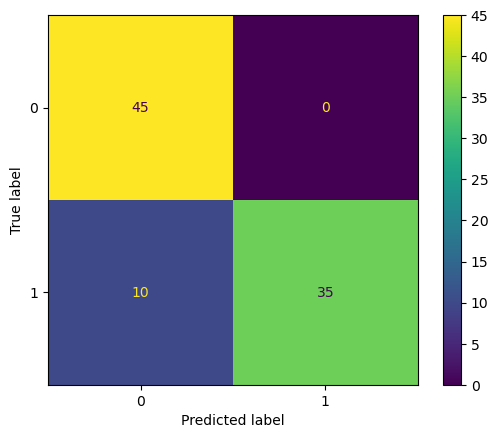

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test_5, answers_5_shuffled)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show() 

## 3 Classes

In [37]:
# dataset with LaTeX code for question
written_data=pd.read_excel(r"C:\Users\CK\Desktop\DATA4010 Project\Q1 iPad Data.xlsx")

#include all data
w_data=written_data["Data"]
w_data=['.' if x is np.nan else x for x in w_data]
target_w=written_data["Target"]

w_data = np.array(w_data)
target_w = np.array(target_w)


num_samp=len(w_data)
random_indices = np.random.permutation(num_samp)
X_test=w_data[random_indices]
y_test=target_w[random_indices]



In [38]:
combined_strings_all_Q1 = []
for i in range(0, len(X_test), 10):
    combined_string = '|'.join(w_data[i:i+10])
    combined_strings_all_Q1.append(combined_string)
# can combine strings for this test only! 

In [40]:
# adjusted prompt for 3 classes
instructions='''
respond with 0 for a wrong answer, 2 for a right answer, and 1 for an answer that is partially correct. 
Only answer with 0 or 1 or 2, the question is:
Determine $\\lim _{x \rightarrow \\infty} \x0crac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4}$. 
a 2 must be given when the correct answer, 1/3 is written and 
a sufficient amount of work is shown, 
a 1 should be given when either some correct work is shown, 
or the correct answer is given with no work
provided. A 0 should be given when no correct work is shown. 
Each content has 10 answers, please provide 10 answers for each, separated by a comma
'''

In [40]:
Q1_whole=[]
val=0
start=time.time()
for dat in combined_strings_all_Q1:
    
    val=val+1
    print(val)# tracker to ensure loop is working
    response = client.chat.completions.create(
      model="gpt-4",
      messages=[
          {"role": "system", "content": instructions},
          {"role": "user", "content": dat},
      ]
    )
    


    classification=response.choices[0].message.content
    Q1_whole.append(classification)
end=time.time()
print(str(end-start) + " seconds")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
21.47511577606201 seconds


In [41]:
answers_Q1 = []

for strings in Q1_whole:
    answers_Q1.extend([int(element.strip()) for element in strings.split(',')])
    
print(len(answers_Q1))

150


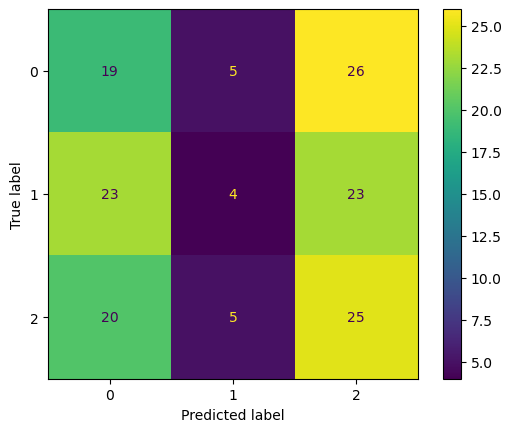

In [42]:
confusion_matrix = metrics.confusion_matrix(y_test, answers_Q1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])

cm_display.plot()
plt.show() 

## 5 Training Examples per Class

In [46]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(w_data, target_w, test_size=135, 
                                                            stratify=target_w, random_state=42)


In [41]:
instructions_5='''
respond with 0 for a wrong answer, 2 for a right answer, and 1 for an answer that is partially correct. 
Only answer with 0 or 1 or 2, the question is: 
Determine $\\lim _{x \rightarrow \\infty} \x0crac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4}$. 
a 2 must be given when the correct answer, 1/3 is written and a sufficient amount of work is shown,
a 1 should be given when either some correct work is shown, or the correct answer is given with no work provided. 
A 0 should be given when no correct work is shown. The training values are as follows: 
'''


training_5 = ""
for i in range(len(X_train_5)):
    training_5+=(X_train_5[i] + ", scores a " +str(y_train_5[i])+ ", ")

instructions_5+=training_5
instructions_5

'\nrespond with 0 for a wrong answer, 2 for a right answer, and 1 for an answer that is partially correct. \nOnly answer with 0 or 1 or 2, the question is: \nDetermine $\\lim _{x \rightarrow \\infty} \x0crac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4}$. \na 2 must be given when the correct answer, 1/3 is written and a sufficient amount of work is shown,\na 1 should be given when either some correct work is shown, or the correct answer is given with no work provided. \nA 0 should be given when no correct work is shown. The training values are as follows: \nthe limit is 0, scores a 0, $$\n=0\n$$, scores a 0, ., scores a 0, $$\n\\begin{gathered}\n\\lim _{x \\rightarrow \\infty} \\frac{1+ \\pi \\frac{\\sin (2 x)}{x}}{3+x^{-1 / x}+4 / 3} \\\\\n=1 / 3\n\\end{gathered}\n$$, scores a 1, $$\n\\begin{array}{r}\n=\\lim _{x \\rightarrow \\infty} \\frac{x+\\pi \\sin (2 x)}{3 x+\\sqrt{x}+4} \\\\\n=\\lim _{x \\rightarrow \\infty} \\frac{\\frac{1+\\pi \\sin (2 x)}{x}}{3+x^{-1 / 2}+\\frac{4}{x}} \\\\\n=1 / 3\

In [49]:
Q1_whole_5=[]
val=0
start=time.time()
for dat in X_test_5:
    
    val=val+1
    print(val)# tracker to ensure loop is working
    response = client.chat.completions.create(
      model="gpt-4",
      messages=[
          {"role": "system", "content": instructions_5},
          {"role": "user", "content": dat},
      ]
    )


    classification=response.choices[0].message.content
    Q1_whole_5.append(classification)
end=time.time()
print(str(end-start) + " seconds")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
76.40234899520874 seconds


In [51]:
answers_Q1_5 = []

for strings in Q1_whole_5:
    answers_Q1_5.extend([int(element.strip()) for element in strings.split(',')])
    
print(len(answers_Q1_5))

135


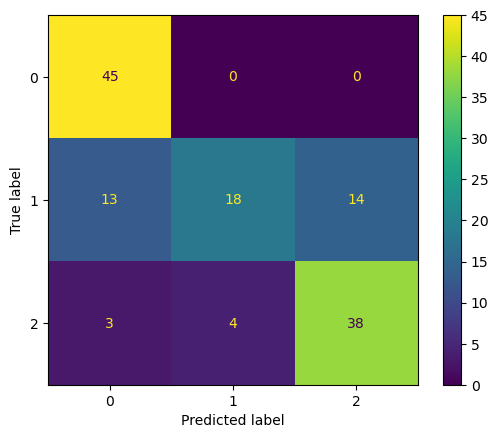

In [52]:
confusion_matrix = metrics.confusion_matrix(y_test_5, answers_Q1_5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1,2])

cm_display.plot()
plt.show() 